Emma Simmons

$\textbf{Homework 3 Part 1}$ 

$\textbf{Question 1 Part 1:}$

In [22]:
import math 
import numpy as np
from matplotlib import pyplot as plt


def div_diff(x_nodes, f_nodes): 
    #finds the c coefficients for Newton's form using divided difference 
    #x_nodes are the nodes, f_nodes are the corresponding f values at those nodes
    #outputs an array of the c coefficients 
    n=len(x_nodes)
    c=np.zeros(n+1)
    for j in range(0, n):
        c[j]=f_nodes[j]
    for k in range(1,n+1):
        for j in reversed(range(k,n)):
            c[j]=(c[j]-c[j-1])/(x_nodes[j]-x_nodes[j-k])
    return c 
        
def Newton_interp(x, x_nodes, f_nodes):
    #evaluation of the interpolation polynomial in Newton’s form
    #x is the point we are evaluating at, x_nodes are the nodes, f_nodes are the corresponding f values at those nodes
    #outputs the polynomial evaluated at x 
    n=len(x_nodes)-1
    p=div_diff(x_nodes, f_nodes)[n]
    for j in reversed(range(0,n)):
        p=div_diff(x_nodes, f_nodes)[j]+(x-x_nodes[j])*p
    return p 

x_nodes=[3, 1, 5, 6]
f_nodes=[1,-3,2, 4]


Newton_interp(1, x_nodes, f_nodes) #test of Newton_interp code using x_nodes and f_nodes as above



-3.0

$\textbf{Question 1 Part 2:}$

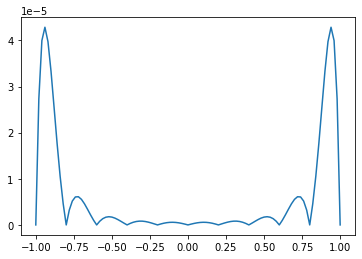

In [23]:

def f(x):
    return x*np.exp(-1*(x**2))

x_j=np.array([-1+j*(2/10) for j in range(0,11)]) #our nodes
f_x_j=f(x_j)
x_j_bar=np.array([-1+j*(2/100) for j in range(0,101)]) #points we are evaluating at 

p_10_x=Newton_interp(x_j_bar, x_j, f_x_j) #evaluates p10_x for the given nodes 

error=abs(f(x_j_bar)-p_10_x) #computes the error between the function and the polynomial interpolation

plt.plot(x_j_bar, error) #plots the error 




$\textbf{Question 4:}$

In [24]:
def z_i_values(x_i, y_i):
    #computes the z_i values necessary to compute the natural spline 
    #x_i are the x component of the points, y_i are the y components of the points 
    #returns an array of z_i values 
    n=len(x_i)
    h=[]
    b=[]
    u=[]
    v=[]
    z=np.zeros(n)
    for i in range(0,n-1):
        hi=x_i[i+1]-x_i[i]
        h.append(hi)
        bi=6*(y_i[i+1]-y_i[i])/hi
        b.append(bi)
    u1=2*(h[0]+h[1])
    v1=b[1]-b[0]
    u.append(u1)
    v.append(v1)
    for i in range(1,n-1):
        ui=(2*(h[i]+h[i-1]))-(((h[i-1])**2)/u[i-1])
        u.append(ui)
        vi=b[i]-b[i-1]-((h[i-1]*v[i-1])/u[i-1])
        v.append(vi)
    for i in range(n-2, 0, -1):
        zi=(v[i]-(h[i]*z[i+1]))/(u[i])
        z[i]=zi
    return z



def S_x(x, x_i, y_i, z_i):
    #computes the natural spline interpolating a collection of points at a given x 
    #x is the point we evaluate at,x_i are the x component of the points, y_i are the y components of the points, z_i are the values from the previous part
    #outputs a polynomial evaluated at x
    n=len(x_i)-1
    h=np.zeros(n+1)
    for j in range(0,n):
        h[j]=x_i[j+1]-x_i[j]
        if x_i[j]<=x<= x_i[j+1]:
            a_j=(1/(6*h[j]))*(z_i[j+1]-z_i[j])
            b_j=z_i[j]/2
            c_j=-1*((h[j]/6)*z_i[j+1])-((h[j]/3)*z_i[j])+((1/h[j])*(y_i[j+1]-y_i[j]))
            d_j=y_i[j]
            output=d_j+(x-x_i[j])*(c_j+(x-x_i[j])*(b_j+(x-x_i[j])*a_j))
            return output
    h[n-1]=x_i[n]-x_i[n-1]
    a_j=(1/(6*h[n-1]))*(z_i[n]-z_i[n-1])
    b_j=z_i[n-1]/2
    c_j=-1*((h[n-1]/6)*z_i[n])-((h[n-1]/3)*z_i[n-1])+((1/h[n-1])*(y_i[n]-y_i[n-1]))
    d_j=y_i[n-1]
    output=d_j+(x-x_i[n-1])*(c_j+(x-x_i[n-1])*(b_j+(x-x_i[n-1])*a_j))
    
    return output




$\textbf{Question 5:}$

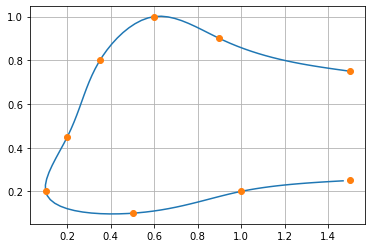

In [25]:
#the data from the table 
t_j=[0,0.618,0.935,1.255,1.636,1.905,2.317,2.827,3.330]
x_j=[1.5,0.90,0.60,0.35,0.20,0.1,0.50,1.00,1.50]
y_j=[0.75,0.90,1.00,0.80,0.45,0.20,0.10,0.20,0.25]

#computes z_i values for t_j with respect to x_j and y_j 
z_i_x=z_i_values(t_j, x_j)
z_i_y=z_i_values(t_j, y_j)

t=np.linspace(0, 3.3, 100)

spline_vec_x=np.zeros(len(t))
for i in range(len(t)): #computes the natural spline interpolating (t_j, x_j)
    spline_vec_x[i]=S_x(t[i], t_j, x_j, z_i_x)

spline_vec_y=np.zeros(len(t))
for i in range(len(t)): #computes the natural spline interpolating (t_j, y_j)
    spline_vec_y[i]=S_x(t[i], t_j, y_j, z_i_y)

plt.grid()    
plt.plot(spline_vec_x, spline_vec_y) #plots the parametric curve 
plt.plot(x_j, y_j, 'o')


$\textbf{Homework 3 Part 2}$

$\textbf{Question 4}$

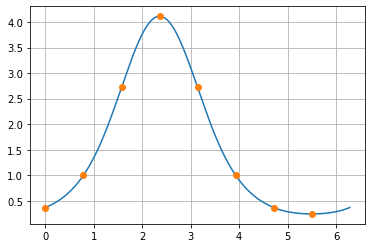

In [82]:
from scipy.fft import fft, ifft

def P_N(x, f_val):
    #computes the trigonometric polynomial of the lowestorder that interpolates the periodic array f_j
    #x is the point it is evaluated at, f_val are the f_j values corresponding to the nodes
    #outputs the interpolating polynomial evaluated at x
    N=len(f_val)
    c_k=fft(f_val)
    a_k=np.zeros(N)
    b_k=np.zeros(N)
    for i in range(0, N):
        a_k[i]=((c_k[i].real)*2)/N
    for i in range(0, N):
        b_k[i]=((c_k[i].imag)*-2)/N
    s=(a_k[0])/2
    for i in range(1,int(N/2)):
        s+= a_k[i]*np.cos(i*x)+b_k[i]*np.sin(i*x)
    s+= a_k[int(N/2)]/2*np.cos(N/2*x)
    return s

f_j=[0.3679, 1.0000, 2.7183, 4.1133, 2.7183, 1.0000, 0.3679, 0.2431] 
N=len(f_j)
x_j=[np.pi*2*j/N for j in range(N)] #x nodes
x=np.linspace(0, 2*np.pi, 1000) #x axis 

plt.grid()
plt.plot(x, P_N(x, f_j), x_j, f_j, 'o') #plots the polynomial P_N and the (x_j,f_j) points in orange 
    

$\textbf{Question 5}$

The following graph shows the P_8 polynomial.


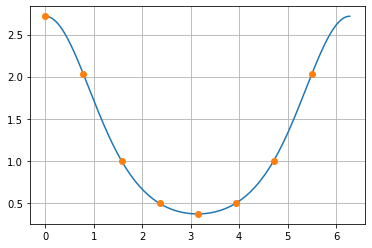

In [69]:
N=8
def f(x): #outputs the value of the function f at x 
    return np.exp(np.cos(x))

x_j=[np.pi*2*j/N for j in range(N)] #x nodes 
f_j=[f(x) for x in x_j] #corresponding f values at x nodes

plt.grid()
plt.plot(x, P_N(x, f_j), x_j, f_j, 'o') #plots the P_8 polynomial for the f_j values corresponding to our f(x) function
print('The following graph shows the P_8 polynomial.')
plt.show()

The following graph shows the P_8 prime polynomial.


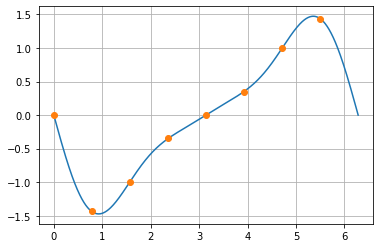

In [67]:
def P_N_prime(x, f_val): 
    #computes P_N prime function at a certain x value
    #x is the point it is evaluated at, f_val are the f_j values corresponding to the nodes
    #outputs the interpolating polynomial P_N prime evaluated at x
    N=len(f_j)
    c_k=fft(f_j)
    a_k=np.zeros(N)
    b_k=np.zeros(N)
    for i in range(0, N):
        a_k[i]=((c_k[i].real)*2)/N
    for i in range(0, N):
        b_k[i]=((c_k[i].imag)*-2)/N
    s=0
    for i in range(1, int(N/2)):
        s+=(i*b_k[i]*np.cos(i*x))-(i*a_k[i]*np.sin(i*x)) 
    return s

def f_prime(x): #outputs the value of the function f' at x
    return -1*np.sin(x)*np.exp(np.cos(x))

f_prime_j=np.array([f_prime(x) for x in x_j])

plt.grid()
plt.plot(x, P_N_prime(x, f_prime_j), x_j, f_prime_j, 'o') #plots P_8 prime polynomial and for the f_j values corresponding to our f_prime(x) function
print('The following graph shows the P_8 prime polynomial.')
plt.show()

The following graph shows the error.


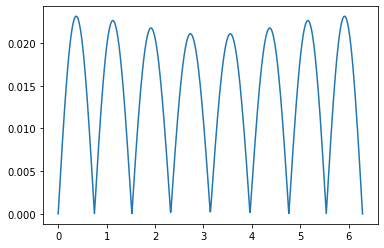

In [68]:
P_8_prime=P_N_prime(x, f_prime_j)
f_prime_j=f_prime(x)
error=np.abs(P_8_prime-f_prime_j)

plt.plot(x, error) #plots the error between the f(x) function and P_8 prime function at the given nodes
print('The following graph shows the error.')
plt.show()